# KNN algorithm

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### Loading dataset

In [2]:
df_raw=pd.read_csv(r"C:\Users\Ksnes\OneDrive\Desktop\5th sem\AIML\smoking.csv")

In [3]:
df_raw.head()

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


In [4]:
df_raw.shape

(1691, 13)

#### Data processing

In [5]:
df_raw.drop('Unnamed: 0', axis=1, inplace=True)
df_raw['amt_weekends'].fillna(0, inplace=True)
df_raw['amt_weekdays'].fillna(0, inplace=True)
df_raw['type'].fillna('None', inplace=True)
df_raw['smoke'] = df_raw['smoke'].map({'Yes': 1, 'No': 0})

In [6]:
df_raw.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,0,0.0,0.0,None
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,1,12.0,12.0,Packets
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,0,0.0,0.0,None
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,0,0.0,0.0,None
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,0,0.0,0.0,None


#### implementing algorithm

In [7]:
# Convert categorical variables into numerical ones
df_encoded = pd.get_dummies(df_raw)

In [8]:
# Split the data into features (X) and target (y)
X = df_encoded.drop('smoke', axis=1)
y = df_encoded['smoke']

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

In [11]:
# Print classification report
print(classification_report(y_test, y_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100}%')

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       258
           1       0.98      0.75      0.85        81

    accuracy                           0.94       339
   macro avg       0.96      0.87      0.91       339
weighted avg       0.94      0.94      0.94       339

Accuracy: 93.80530973451327%


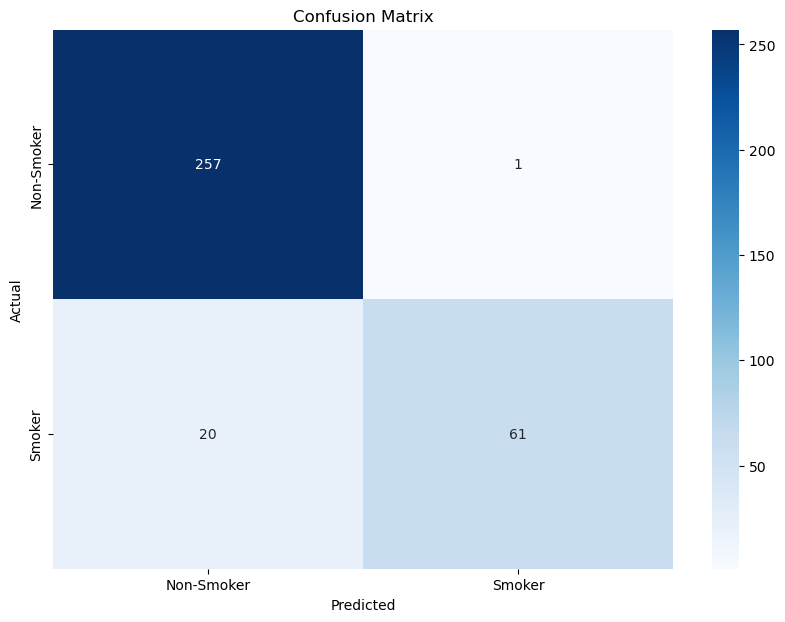

In [12]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to DataFrame (for better visual)
cm_df = pd.DataFrame(cm, index=['Non-Smoker', 'Smoker'], columns=['Non-Smoker', 'Smoker'])

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()